### Age Detection of Indian Actors

In [ ]:
import sys
sys.modules[__name__].__dict__.clear()

In [ ]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/DeepvLearning/agedetectiontrain.zip"


In [ ]:
!unzip -q "/content/drive/MyDrive/DeepvLearning/agedetectiontest.zip"


In [ ]:
# Reading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Age group: MIDDLE


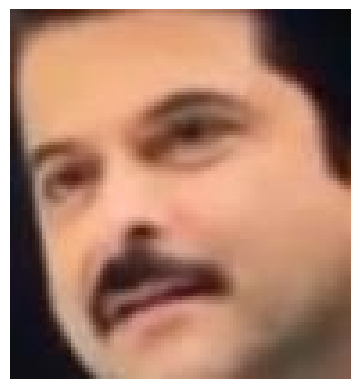

In [ ]:
# Displaying any random movie character along with age group
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

### Few problems with the images:
- Variations in shape: One image has a shape of (66, 46) whereas another has (102, 87).
- Multiple viewpoints: Faces with different view possible!
- Discrepancy in brightness and contrast.
- Quality of images: Some images were found to be too pixelated.

In [ ]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    print(img)
    temp.append(img)

train_x = np.stack(temp)

Streaming output truncated to the last 5000 lines.
  [149. 109.  87.]
  [147. 109.  87.]]]
[[[ 29.  21.   8.]
  [ 25.  20.   5.]
  [ 23.  20.   5.]
  ...
  [ 56.  34.  20.]
  [ 36.  23.   5.]
  [ 37.  27.   6.]]

 [[ 26.  22.   7.]
  [ 22.  20.   5.]
  [ 19.  20.   4.]
  ...
  [ 52.  33.  15.]
  [ 42.  27.   8.]
  [ 35.  26.   6.]]

 [[ 23.  21.   7.]
  [ 21.  21.   5.]
  [ 18.  21.   4.]
  ...
  [ 47.  27.   5.]
  [ 53.  31.  12.]
  [ 49.  28.  11.]]

 ...

 [[ 28.  18.   6.]
  [ 34.  19.   4.]
  [ 44.  24.   5.]
  ...
  [149.  81.  50.]
  [ 48.  23.   7.]
  [ 37.  22.   8.]]

 [[ 26.  18.   6.]
  [ 29.  18.   4.]
  [ 38.  23.   6.]
  ...
  [147.  88.  51.]
  [ 46.  23.   7.]
  [ 43.  25.  11.]]

 [[ 26.  19.   6.]
  [ 27.  17.   3.]
  [ 38.  22.   7.]
  ...
  [126.  83.  41.]
  [ 45.  26.   7.]
  [ 45.  26.  12.]]]
[[[ 25.  24.  30.]
  [ 27.  26.  32.]
  [ 25.  24.  30.]
  ...
  [ 37.  26.  32.]
  [ 37.  26.  32.]
  [ 38.  27.  33.]]

 [[ 23.  22.  28.]
  [ 25.  24.  29.]
  [ 25.  23

In [ ]:
# Image resizing of test data into single numpy array
temp = []
for img_name in test.ID:
    img_path = os.path.join('Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)

test_x = np.stack(temp)

In [ ]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
# Knowing the distribution of classes in data
print(train.Class.value_counts(normalize=True))

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64


In [ ]:
# Encoding the categorical variable to numeric
from keras import utils as np_utils
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

### Building a Deep Neural Network for Age Group Detection

In [ ]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 1

In [ ]:
# Defining the network
model = Sequential([InputLayer(input_shape=input_num_units),
  Flatten(),  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [ ]:
# Printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
19906/19906 [==============================] - 115s 6ms/step - loss: 0.8063 - accuracy: 0.6398
Epoch 2/5
19906/19906 [==============================] - 104s 5ms/step - loss: 0.7970 - accuracy: 0.6448
Epoch 3/5
19906/19906 [==============================] - 104s 5ms/step - loss: 0.7866 - accuracy: 0.6489
Epoch 4/5
19906/19906 [==============================] - 103s 5ms/step - loss: 0.7820 - accuracy: 0.6524
Epoch 5/5
19906/19906 [==============================] - 101s 5ms/step - loss: 0.7729 - accuracy: 0.6582


In [ ]:
locals()['_oh'] = {}

In [ ]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Epoch 1/5
15924/15924 [==============================] - 87s 5ms/step - loss: 0.7676 - accuracy: 0.6620 - val_loss: 0.7878 - val_accuracy: 0.6743
Epoch 2/5
15924/15924 [==============================] - 87s 5ms/step - loss: 0.7574 - accuracy: 0.6674 - val_loss: 0.7343 - val_accuracy: 0.6798
Epoch 3/5
15924/15924 [==============================] - 88s 6ms/step - loss: 0.7510 - accuracy: 0.6692 - val_loss: 0.7297 - val_accuracy: 0.6888
Epoch 4/5
15924/15924 [==============================] - 88s 6ms/step - loss: 0.7450 - accuracy: 0.6751 - val_loss: 0.7418 - val_accuracy: 0.6733
Epoch 5/5
15924/15924 [==============================] - 91s 6ms/step - loss: 0.7341 - accuracy: 0.6785 - val_loss: 0.7299 - val_accuracy: 0.6881


In [ ]:
# Predicting and importing the result in a csv file
#pred = model.predict_classes(test_x)
pred = np.argmax(model.predict(test_x), axis=-1)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('out.csv', index=False)

208/208 [==============================] - 2s 4ms/step


208/208 [==============================] - 1s 3ms/step
Original: MIDDLE Predicted: YOUNG


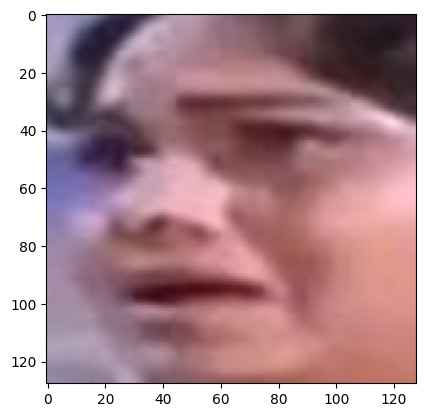

In [ ]:
# Visual Inspection of predictions
idx = 1785
img_name = test.ID[idx]
img = imageio.imread(os.path.join('Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x), axis=-1)
pred = lb.inverse_transform(pred)
print('Original:', train.Class[idx], 'Predicted:', (pred[idx]))

#### This is the result at current 64.51% training accuracy of the model.
#### The model can be further improved using hyper-parameter tuning as well as using other image processing techniques.